Source data: yfinance
- BBCA (23/11/2020 - 23/11/2022)
- BBNI (23/11/2020 - 23/11/2022)
- BUMI (23/11/2020 - 23/11/2022)
- INDY (23/11/2020 - 23/11/2022)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
from IPython.display import Markdown

from pandas_datareader.data import DataReader
from datetime import datetime

sns.set_theme(style="whitegrid")
# plt.style.use("fivethirtyeight")

In [2]:
stock_list = ['bbca', 'bbni', 'bumi', 'indy', 'sido']
stock_code = ['BBCA', 'BBNI', 'BUMI', 'INDY', 'SIDO']

for a, x in zip(stock_list, stock_code):
    globals()[a] = pd.read_csv(f"C:\\Users\\LENOVO\\Stocks_exploration\\Stocks-Exploration\\data\\{x}_30_11_2022.csv", encoding='utf-8')
    globals()[a]['Date'] = pd.to_datetime(globals()[a]['Date'])
    globals()[a]['Volume'] = globals()[a]['Volume'].astype(int)

com_list = [bbca, bbni, bumi, indy, sido] 
df = pd.concat(com_list, axis=0)

bbca.head()

,Date,Open,High,Low,Close,Volume
0,2020-01-02,6695.0,6780.0,6680.0,6690.0,49445000
1,2020-01-03,6750.0,6800.0,6725.0,6800.0,47755500
2,2020-01-06,6720.0,6750.0,6690.0,6735.0,27300000
3,2020-01-07,6735.0,6770.0,6730.0,6740.0,45022500
4,2020-01-08,6670.0,6745.0,6670.0,6680.0,53692500


In [3]:
bbca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    713 non-null    datetime64[ns]
 1   Open    713 non-null    float64       
 2   High    713 non-null    float64       
 3   Low     713 non-null    float64       
 4   Close   713 non-null    float64       
 5   Volume  713 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 30.8 KB


In [4]:
chart1 = f'Open Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
## {title}
""".format(title=chart1))


## Open Price BBCA, BBNI, BUMI, and INDY 2020-2022


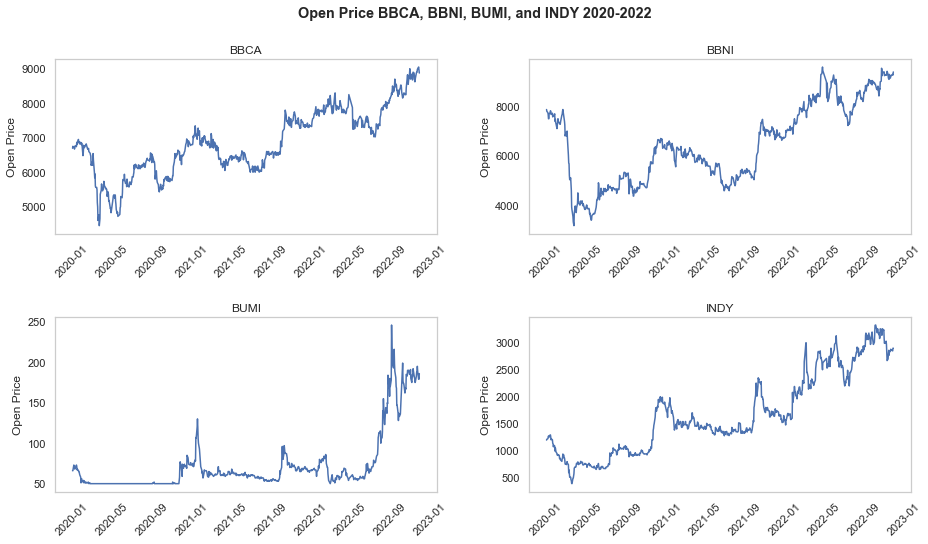

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart1}', fontweight='bold')

for x, y, ax in zip(stock_list, stock_code, axs.ravel()):
    ax.plot('Date','Open',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Open Price')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [6]:
chart2 = f'Close Price {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
## {title}
""".format(title=chart2))


## Close Price BBCA, BBNI, BUMI, and INDY 2020-2022


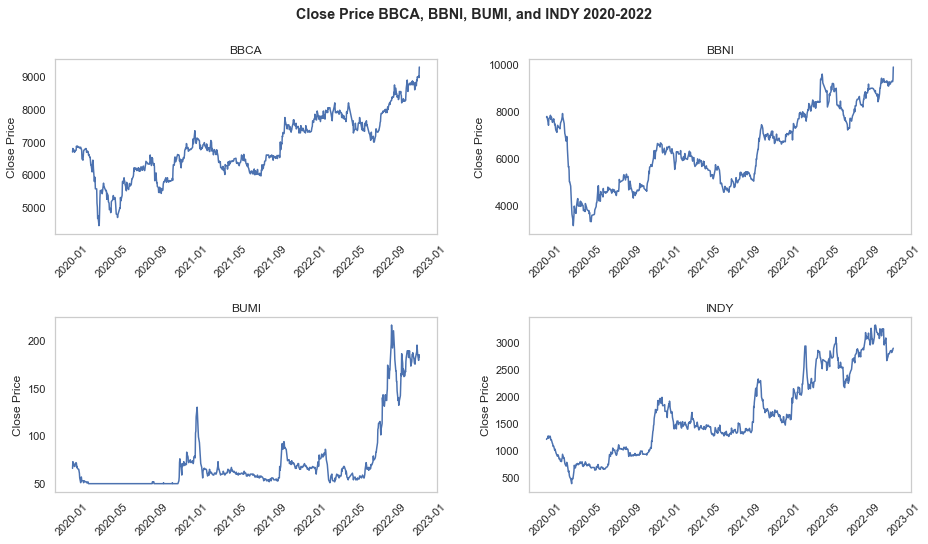

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart2}', fontweight='bold')

for x, y, ax in zip(stock_list, stock_code, axs.ravel()):
    ax.plot('Date','Close',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Close Price')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [8]:
chart3 = f'Volume {stock_code[0]}, {stock_code[1]}, {stock_code[2]}, and {stock_code[3]} 2020-2022'

Markdown("""
## {title}
""".format(title=chart3))


## Volume BBCA, BBNI, BUMI, and INDY 2020-2022


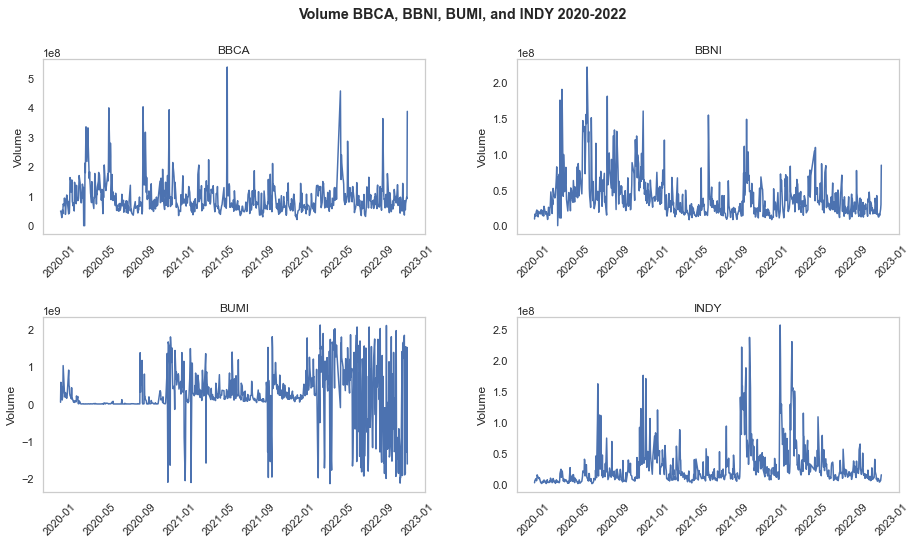

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle(f'{chart3}', fontweight='bold')

for x, y, ax in zip(stock_list, stock_code, axs.ravel()):
    ax.plot('Date','Volume',data=globals()[x])
    ax.set_title(y)
    ax.grid(False)
    ax.set_ylabel('Volume')
    ax.tick_params(axis='x', rotation=45)

plt.show()

In [10]:
chart4 = 'Distribution of Close Price 2020-2022'

Markdown("""
## {title}
""".format(title=chart4))


## Distribution of Close Price 2020-2022


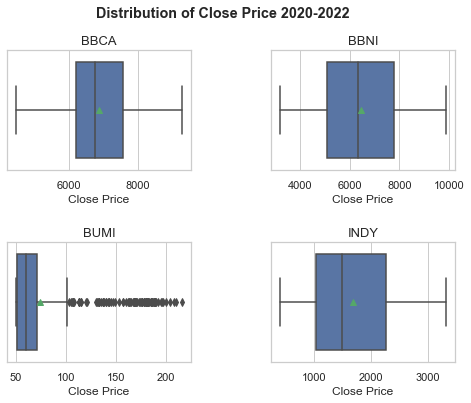

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart4}', fontweight='bold')

g_stock = ['g_bbca', 'g_bbni', 'g_bumi', 'g_indy']

for x, y, z, ax in zip(stock_list, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(x='Close', data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z ,fontweight="normal", size=13, y=1)
    y.set_xlabel('Close Price', fontsize = 12)

plt.show()

In [12]:
chart5 = 'Average Close Price Per Month'

Markdown("""
## {title}
""".format(title=chart5))


## Average Close Price Per Month


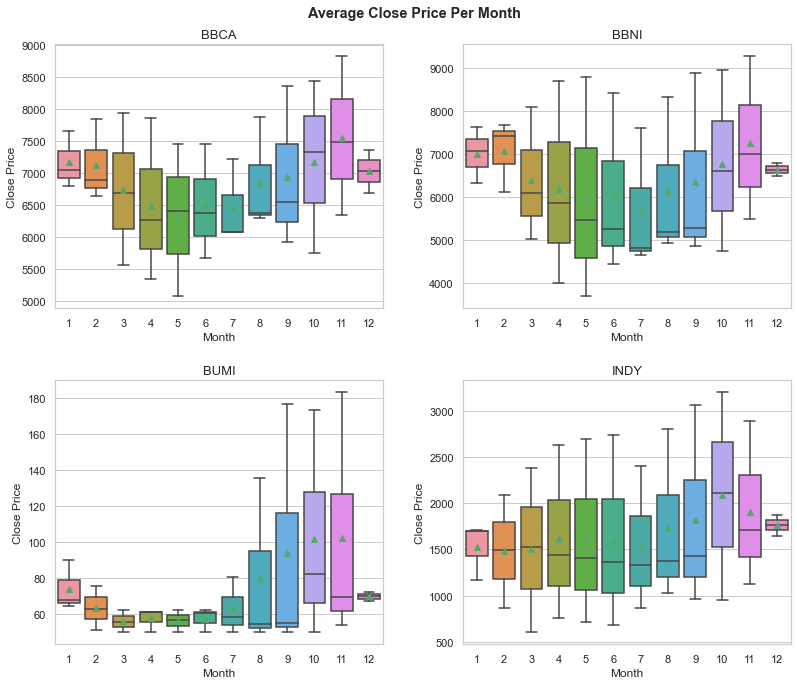

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

stock_resample = ['bbca_sample', 'bbni_sample', 'bumi_sample', 'indy_sample']

for x, y in zip(stock_list, stock_resample):
    globals()[y] = globals()[x].resample('M', on='Date').mean()

fig.suptitle(f'{chart5}', fontweight='bold')

for x, y, z, ax in zip(stock_resample, g_stock, stock_code, axes.flatten()):
    y = sns.boxplot(y="Open",x=globals()[x].index.month, data=globals()[x], showmeans=True, ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1)
    y.set_xlabel('Month', fontsize = 12)
    y.set_ylabel('Close Price')
    
plt.show()

In [14]:
chart6 = 'Correlation of Month, Year, and Average Closing Price'

Markdown("""
## {title}
""".format(title=chart6))


## Correlation of Month, Year, and Average Closing Price


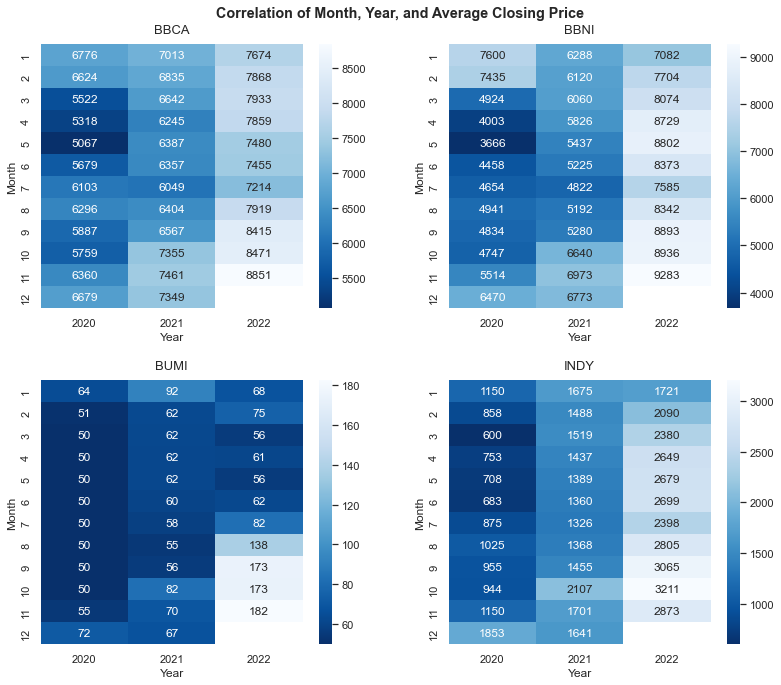

In [15]:
stock_pivot =['bbca_pivot', 'bbni_pivot', 'bumi_pivot', 'indy_pivot']

for x, y in zip(stock_pivot, stock_resample):
    globals()[y]["Bulan"] = globals()[y].index.month
    globals()[y]["Tahun"] = globals()[y].index.year
    globals()[x] = globals()[y].pivot("Bulan", "Tahun", "Close")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()
fig.tight_layout(pad=4)

fig.suptitle(f'{chart6}', fontweight='bold')

for x, y, z, ax in zip(stock_pivot, g_stock, stock_code, axes.flatten()):
    y = sns.heatmap(data=globals()[x], annot=True, fmt=".0f", cmap = 'Blues_r', ax=ax)
    y.set_title(z, fontweight="normal", size=13, y=1.02)
    y.set_xlabel('Year', fontsize = 12)
    y.set_ylabel('Month')
    
plt.show()

In [16]:
stocks_code = ['BBCA.JK', 'BBNI.JK', 'BUMI.JK', 'INDY.JK']

# now = dt.now().strftime('%Y-%m-%d')

closing_df = DataReader(stocks_code, 'yahoo', '2020-01-01', '2022-11-30')['Close']

closing_df.rename(columns = {'BBCA.JK':'BBCA', 'BBNI.JK':'BBNI', 'BUMI.JK':'BUMI', 'INDY.JK':'INDY'}, inplace = True)
closing_df.head()

stock_rets = closing_df.pct_change()
stock_rets.head()

Symbols,BBCA,BBNI,BUMI,INDY
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.016442,0.003215,0.106061,0.012397
2020-01-06,-0.009559,-0.022436,-0.054795,0.008163
2020-01-07,0.000742,-0.009836,0.000000,0.032389
2020-01-08,-0.008902,-0.016556,-0.014493,-0.023529


In [17]:
chart7 = 'Stocks Correlation'

Markdown("""
## {title}
""".format(title=chart7))


## Stocks Correlation


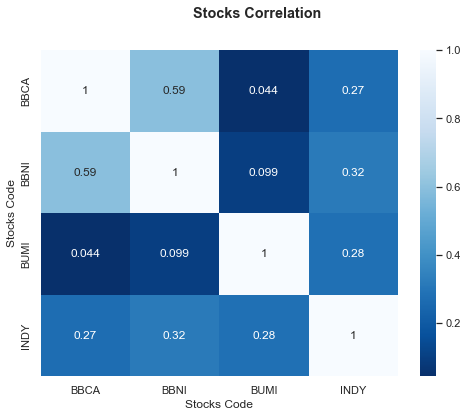

In [18]:
plt.figure(figsize=(8, 6))

plt.suptitle(f'{chart7}', fontweight='bold')

g = sns.heatmap(stock_rets.corr(), annot=True, cmap = 'Blues_r')
g.set(ylabel='Stocks Code', xlabel='Stocks Code')

plt.show()

In [19]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in com_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

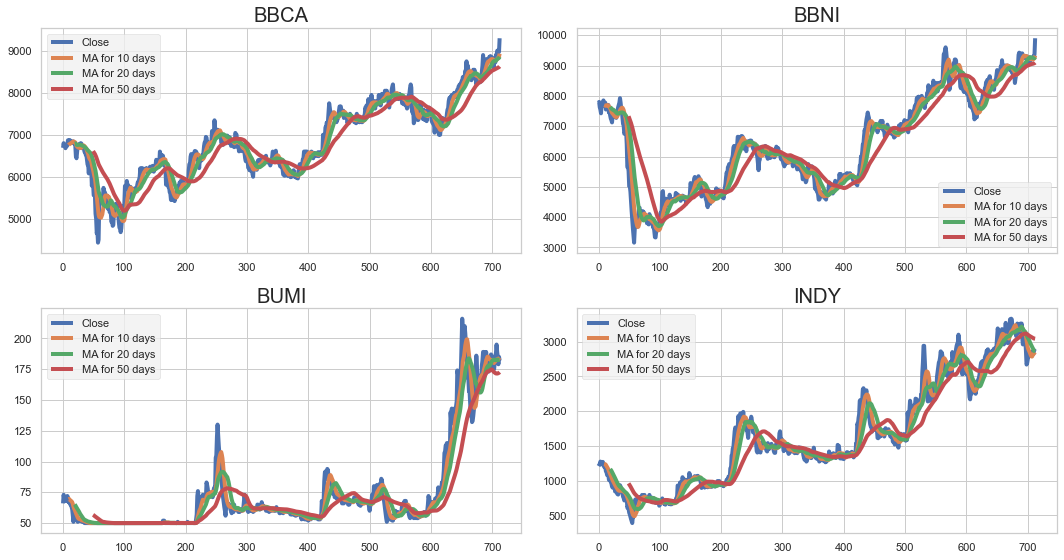

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

bbca[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title(f'{stock_code[0]}')
# axes[0,0]

bbni[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title(f'{stock_code[1]}')

bumi[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title(f'{stock_code[2]}')

indy[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title(f'{stock_code[3]}')

fig.tight_layout()

ValueError: style must be one of white, dark, whitegrid, darkgrid, ticks

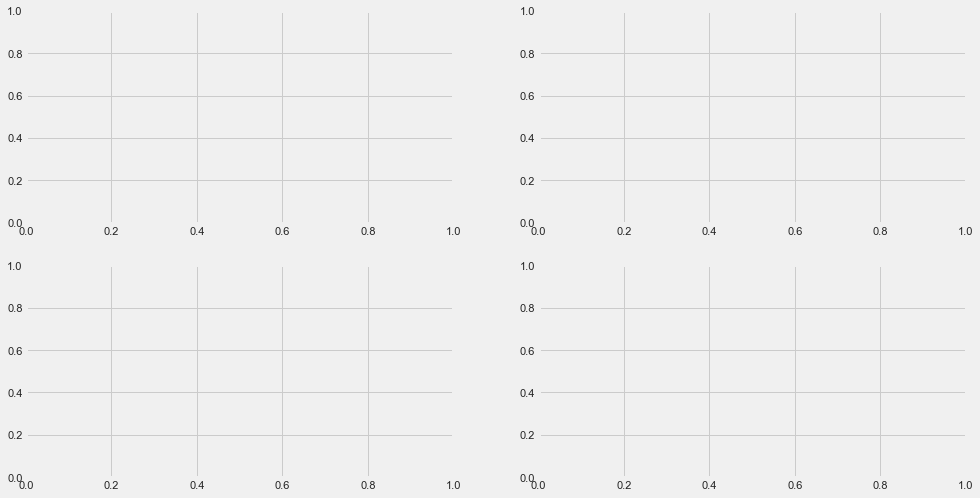

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

sns.set_style('default')
plt.style.use("default")

bbca[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title(f'{stock_code[0]}')
# axes[0,0]

bbni[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title(f'{stock_code[1]}')

bumi[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title(f'{stock_code[2]}')

indy[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title(f'{stock_code[3]}')

fig.tight_layout()

In [21]:
# import pandas as pd
# import numpy as np

# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('whitegrid')
# plt.style.use("fivethirtyeight")
# %matplotlib inline

# # For reading stock data from yahoo
# from pandas_datareader.data import DataReader
# import yfinance as yf

# # For time stamps
# from datetime import datetime

In [22]:
# # The tech stocks we'll use for this analysis
# tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# # Set up End and Start times for data grab
# tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# end = datetime.now()
# start = datetime(end.year - 1, end.month, end.day)

# for stock in tech_list:
#     globals()[stock] = yf.download(stock, start, end)

In [23]:
# company_list = [AAPL, GOOG, MSFT, AMZN]
# company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# for company, com_name in zip(company_list, company_name):
#     company["company_name"] = com_name

# df = pd.concat(company_list, axis=0)
# df.tail(10)


In [24]:
# ma_day = [10, 20, 50]

# for ma in ma_day:
#     for company in company_list:
#         column_name = f"MA for {ma} days"
# #         company[column_name] = company['Close'].rolling(ma).mean()
#         print(company)

In [25]:
# fig, axes = plt.subplots(nrows=2, ncols=2)
# fig.set_figheight(8)
# fig.set_figwidth(15)

# AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
# axes[0,0].set_title('APPLE')

# GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
# axes[0,1].set_title('GOOGLE')

# MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
# axes[1,0].set_title('MICROSOFT')

# AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
# axes[1,1].set_title('AMAZON')

# fig.tight_layout()